# Itemization Clustering
Cluster customers into groups based on what products they usually order.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scripts import product_processing, order_clustering

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_colwidth', 400)

## Load Data

In [7]:
items_path = '../data/input/items.csv'
save_path = '../data/input/clustered_orders.csv'

load_model = '../data/models/orders_clf.pkl'

In [8]:
pd.read_csv(items_path).head()

,product_id,order_id,order_date,quantity,price_per_unit,segmentation,category,product_name,product_type,product_group
0,DE-PRO-A1359526,DE-R-50511,2017-01-31 21:59:09,3,7.8,DC,drycleaning,Blazer / Jacket,Blazer,Blazer
1,DE-PRO-A1359526,DE-H-42244,2017-01-31 21:27:29,1,7.8,DC,drycleaning,Blazer / Jacket,Blazer,Blazer
2,DE-PRO-A1359526,DE-H-47793,2017-01-31 19:56:12,1,7.8,DC,drycleaning,Blazer / Jacket,Blazer,Blazer
3,DE-PRO-A1359526,DE-W-08882,2017-01-31 19:42:13,1,7.8,DC,drycleaning,Blazer / Jacket,Blazer,Blazer
4,DE-PRO-A1359526,DE-F-80243,2017-01-31 19:35:01,1,7.8,DC,drycleaning,Blazer / Jacket,Blazer,Blazer


## Cluster orders based on product_types

Evaluate number of cluster centers:

In [12]:
kmeans, df_clusters, df_centers = order_clustering.cluster_orders(
    items_path, save_path, save_model_path=load_model, n_clusters=10)

In [13]:
df_clusters.order_id.nunique()

63017

## Plot centers

In [14]:
df_centers = df_centers.set_index('cluster_name', drop=True)

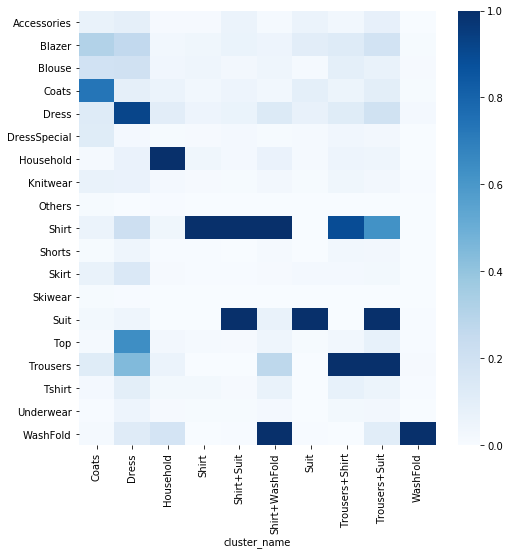

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_centers.sort_index().T, cmap='Blues')